##Boneage Determinition with Machine Learning Methods

images can be found at original kaggle challenge: https://www.kaggle.com/kmader/rsna-bone-age/version/2#boneage-test-dataset.csv

some code borrowed from: https://www.kaggle.com/kmader/bone-age-overview/notebook

Overview:



Import Libraries

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
import os
from glob import glob
import tensorflow as tf
from tensorflow import keras

%matplotlib inline


In [45]:
boneageData = os.path.join('..', 'MachineLearning')
age_df = pd.read_csv('boneage-training-dataset.csv')

age_df['path'] = age_df['id'].map(lambda x: os.path.join(boneageData, 'boneage-training-dataset',
                                                         '{}.png'.format(x)))

age_df['exists'] = age_df['path'].map(os.path.exists)
print(age_df['exists'].sum(), 'images found of', age_df.shape[0], 'total')
age_df['gender'] = age_df['male'].map(lambda x: 'male' if x else 'female')
age_df.dropna(inplace = True)
age_df.sample(3)

12611 images found of 12611 total


,id,boneage,male,path,exists,gender
11583,14466,228,True,../MachineLearning/boneage-training-dataset/14...,True,male
8266,10749,156,True,../MachineLearning/boneage-training-dataset/10...,True,male
7142,9488,106,False,../MachineLearning/boneage-training-dataset/94...,True,female


In [47]:
age_groups = 8
age_df['age_class'] = pd.qcut(age_df['boneage'], age_groups)
age_overview_df = age_df.groupby(['age_class', 
                                  'gender']).apply(lambda x: x.sample(1)
                                                             ).reset_index(drop = True
                                                                          )

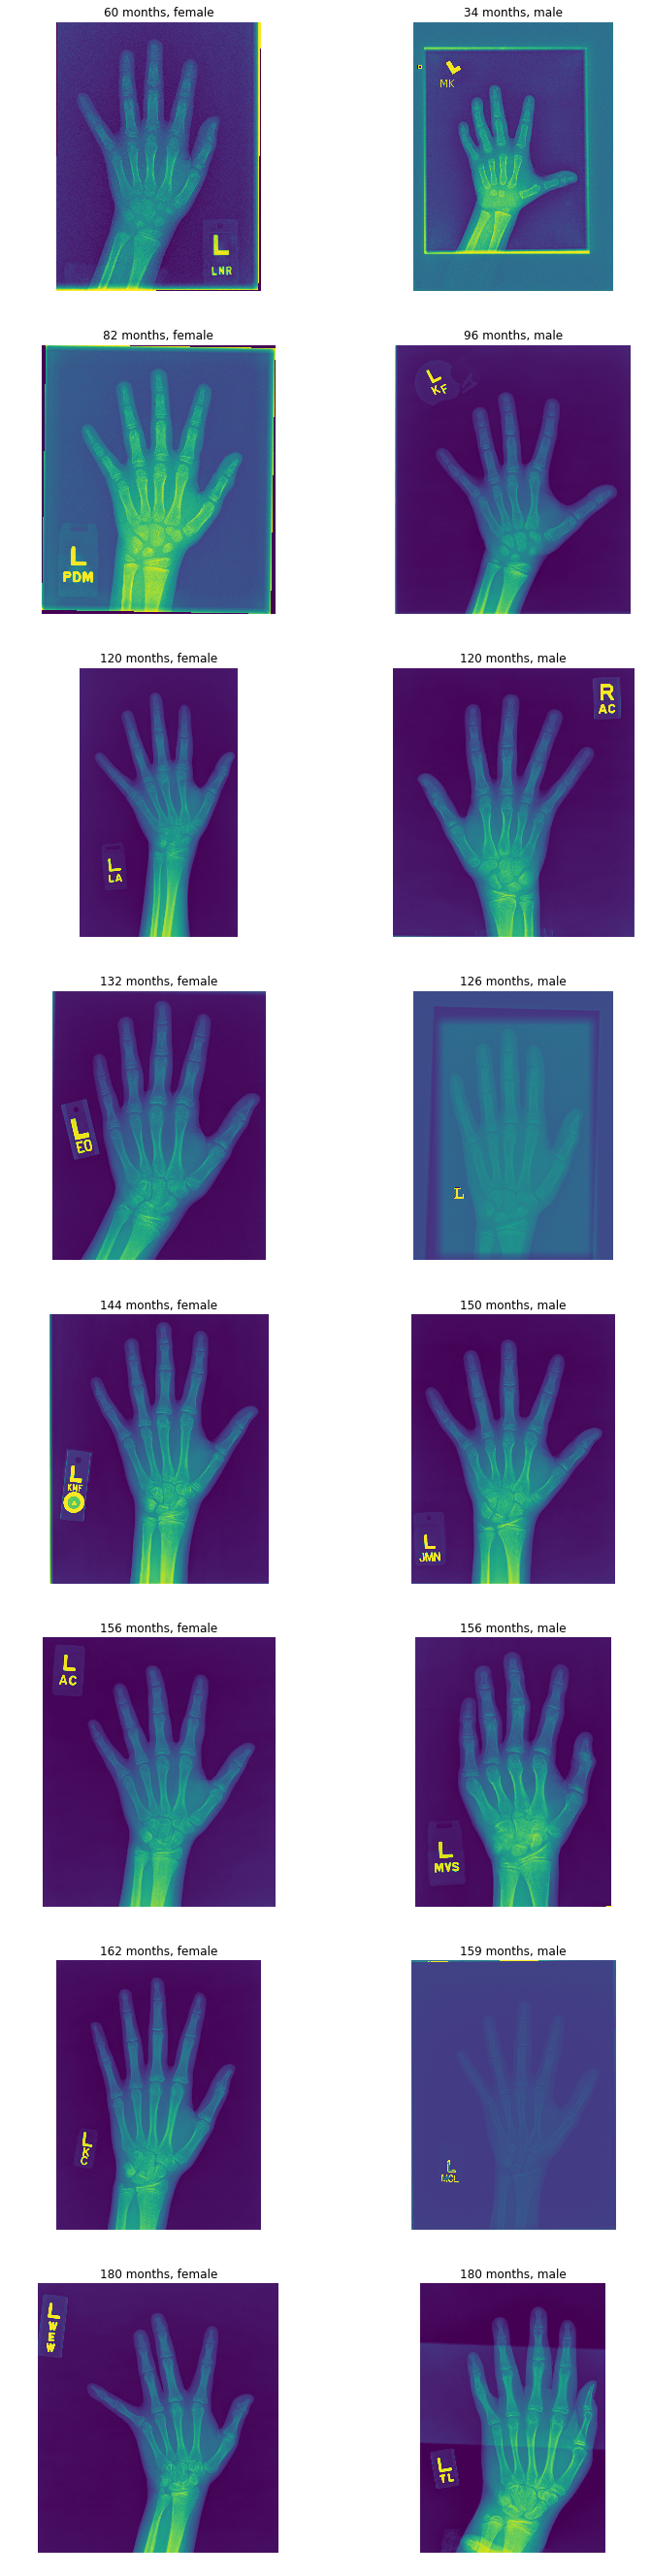

In [48]:
fig, m_axs = plt.subplots( age_groups, 2, figsize = (12, 6*age_groups))
for c_ax, (_, c_row) in zip(m_axs.flatten(), 
                            age_overview_df.sort_values(['age_class', 'gender']).iterrows()):
    c_ax.imshow(imread(c_row['path']),
                cmap = 'viridis')
    c_ax.axis('off')
    c_ax.set_title('{boneage} months, {gender}'.format(**c_row))


In [70]:
X = pd.DataFrame(age_df['path'])
X['male'] = age_df['male']
y = age_df['boneage']

X

,path,male
0,../MachineLearning/boneage-training-dataset/13...,False
1,../MachineLearning/boneage-training-dataset/13...,False
2,../MachineLearning/boneage-training-dataset/13...,False
3,../MachineLearning/boneage-training-dataset/13...,True
4,../MachineLearning/boneage-training-dataset/13...,False
5,../MachineLearning/boneage-training-dataset/13...,True
6,../MachineLearning/boneage-training-dataset/13...,True
7,../MachineLearning/boneage-training-dataset/13...,True
8,../MachineLearning/boneage-training-dataset/13...,True
9,../MachineLearning/boneage-training-dataset/13...,True
